# Solution of Exercise 3

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/phase-plane-analysis.html

fixed_point: (-1.0000000000000002, -4.440892098500626e-16)


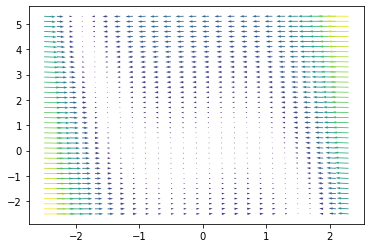

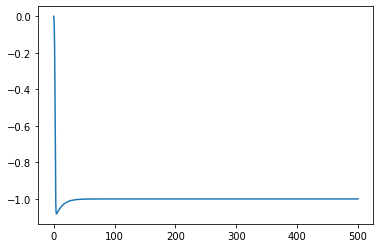

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

fitzhugh_nagumo.plot_flow()

fixed_point = fitzhugh_nagumo.get_fixed_point()
print("fixed_point: {}".format(fixed_point))

plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])


6.1. Exercise: Phase plane analysis

Plot the nullclines in the 𝑢−𝑤 plane, for voltages in the region 𝑢∈[−2.5,2.5].

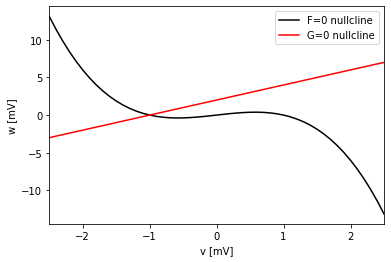

In [2]:
#6.1.1.

#Equations of the FN-model:
#I_e : amp
#    dv/dt = 1/ms * ( v * (1 - (v**2) / (mV**2) ) - w + I_e * Mohm ) : volt
#    dw/dt = eps/ms * (v + 0.5 * (a * mV - w)) : volt

#Set parameters:
I_e = 0.
epsilon = 0.1 #but is meaningless for nullclines right?

v = np.arange(-2.5, 2.51, .1)  # create an array of v values
w_Fe0 = v*(1-v**2)+I_e  # calculate nullcline F(v,w) = 0
w_Ge0 = 2*(v+1)  # calculate nullcline G(v,w) = 0
plt.plot(v, w_Fe0, color='black',label='F=0 nullcline')  # plot F-nullcline as a function of v
plt.plot(v, w_Ge0, color='red',label='G=0 nullcline')  # plot G-nullcline as a function of v
plt.xlim(-2.5, 2.5)  # constrain the x limits of the plot
plt.xlabel("v [mV]")
plt.ylabel("w [mV]")
plt.legend()

6.1.2 Get the lists t, u and w by calling t, u, w = fitzhugh_nagumo.get_trajectory(u_0, w_0, I) for 𝑢0=0, 𝑤0=0 and 𝐼=1.3. They are corresponding values of 𝑡, 𝑢(𝑡) and 𝑤(𝑡) during trajectories starting at the given point (𝑢0,𝑤0) for a given constant input current 𝐼. Plot the nullclines for this given current and the trajectories into the 𝑢−𝑤 plane.

6.1.3 At this point for the same current 𝐼, call the function plot_flow, which adds the flow created by the system Eq. (1) to your plot. This indicates the direction that trajectories will take.

6.1.4 Finally, change the input current in your python file to other values 𝐼>0 and reload it. You might have to first define 𝐼 as a variable and then use this variable in all following commands if you did not do so already. At which value of 𝐼 do you observe the change in stability of the system?

length of t,u and w arrays: 5000
For currents between 1.25 and 2.75 (roughly), we observe a change in the stability in the sense that the trajectory converges to a limit cycle instead of a fixed point.


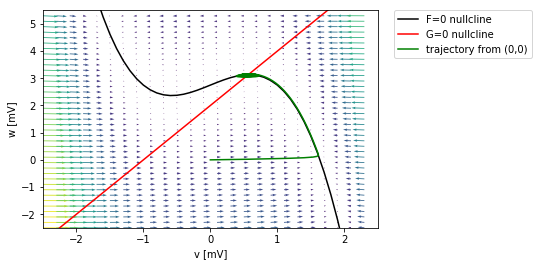

In [10]:
#6.1.2.-6.1.4.

%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

#Set initial conditions
u_0 = 0.
w_0 = 0.
I = 2.75

t, u, w = fitzhugh_nagumo.get_trajectory(u_0, w_0, I)

print("length of t,u and w arrays: {}".format(len(u)))

fitzhugh_nagumo.plot_flow(I_ext=I)


v = np.arange(-2.5, 2.51, .1)  # create an array of v values
w_Fe0 = v*(1-v**2)+I  # calculate nullcline F(v,w) = 0
w_Ge0 = 2*(v+1)  # calculate nullcline G(v,w) = 0
plt.plot(v, w_Fe0, color='black',label='F=0 nullcline')  # plot F-nullcline as a function of v
plt.plot(v, w_Ge0, color='red',label='G=0 nullcline')  # plot F-nullcline as a function of v
plt.plot(u[0:4000], w[0:4000], color='green',label='trajectory from (0,0)')
plt.xlim(-2.5, 2.5)  # constrain the x limits of the plot
plt.ylim(-2.5, 5.5)
plt.xlabel("v [mV]")
plt.ylabel("w [mV]")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

print("For currents between 1.25 and 2.75 (roughly), we observe a change in the stability in the sense that the trajectory converges to a limit cycle instead of a fixed point.")

6.2. Exercise: Jacobian & Eigenvalues

6.2.1 Write a python function get_jacobian(u_0,w_0) that returns the Jacobian evaluated for a given fixed point (𝑢0,𝑣0) as a python list.

6.2.2 The function u0,w0 = get_fixed_point(I) gives you the numerical coordinates of the fixed point for a given current 𝐼. Use the function you created in the previous exercise to evaluate the Jacobian at this fixed point and store it in a new variable J.

6.2.3 Calculate the eigenvalues of the Jacobian J, which you computed in the previous exercise, by using the function np.linalg.eigvals(J). Both should be negative for 𝐼=0.

fixed point x0: [-1.0000000000000002, -4.440892098500626e-16]
Jacobian at fixed point J(x0): [[-2.0000000000000013, -1.0], [0.1, -0.05]]
eigenvalues of J(x0): [0.8940763653560053, 0.05592363464399473]
No trajectory from fixed point!


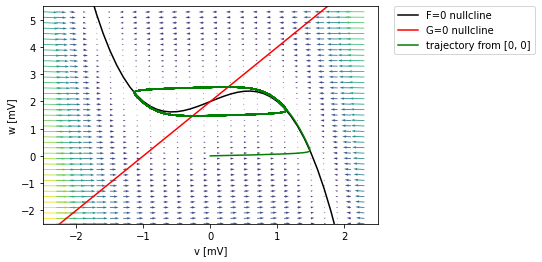

In [18]:
#6.2.1.-6.2.3.

%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

#Set initial conditions and parameters
u0 = 0.
w0 = 0.
I_0 = .0
epsilon = 0.1

#Def function that returns Jacobian of Eq. 2
def get_Jac(a,b):
        return [[1.-3.*a**2.,-1.],[epsilon,-0.5*epsilon]] # return the matrix

u0,w0 = fitzhugh_nagumo.get_fixed_point(I_0)
J = get_Jac(u0,w0)

print("fixed point x0: {}".format([u0, w0]))
print("Jacobian at fixed point J(x0): {}".format(J))

#6.3.2
u0 = 0.
w0 = 0.
I_0 = 2.0
epsilon = 0.1
u0,w0 = fitzhugh_nagumo.get_fixed_point(I_0)
J = get_Jac(u0,w0)

#Compute eigenvalues of J
J_EV_1,J_EV_2 = np.linalg.eigvals(J)
print("eigenvalues of J(x0): {}".format([J_EV_1,J_EV_2]))
if J_EV_1 < 0 and J_EV_2 < 0:
    print("-> both eigenvalues negativ (as expected)")
    
print("No trajectory from fixed point!")

u_start = 0.
w_start = 0.
t, u, w = fitzhugh_nagumo.get_trajectory(u_start, w_start, I_0)
#print("length of t,u and w arrays: {}".format(len(u)))

fitzhugh_nagumo.plot_flow(I_0)

v = np.arange(-2.5, 2.51, .1)  # create an array of v values
w_Fe0 = v*(1-v**2)+I_0  # calculate nullcline F(v,w) = 0
w_Ge0 = 2*(v+1)  # calculate nullcline G(v,w) = 0
plt.plot(v, w_Fe0, color='black',label='F=0 nullcline')  # plot F-nullcline as a function of v
plt.plot(v, w_Ge0, color='red',label='G=0 nullcline')  # plot F-nullcline as a function of v
plt.plot(u, w, color='green',label='trajectory from [0, 0]')
plt.xlim(-2.5, 2.5)  # constrain the x limits of the plot
plt.ylim(-2.5, 5.5)
plt.xlabel("v [mV]")
plt.ylabel("w [mV]")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


6.3. Exercise: Bifurcation analysis: Wrap the code you wrote so far by a loop, to calculate the eigenvalues for increasing values of 𝐼. Store the changing values of each eigenvalue in seperate lists, and finally plot their real values against 𝐼.



In the region around I = [1.3,2.7] (marked blue), the system doesn't converge to a fixed point. Indeed, above, we have seen that there is a limit  cycle.


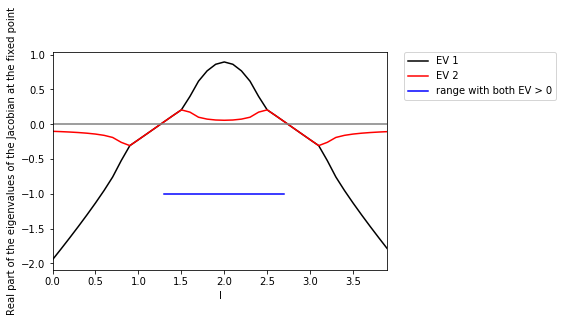

In [1]:
#7.3.1

%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

#Set initial conditions and parameters
u0 = 0.
w0 = 0.
I = 0.
epsilon = 0.1

#Def function that returns Jacobian of Eq. 2
def get_Jac(a,b):
        return [[1.-3.*a**2.,-1.],[epsilon,-0.5*epsilon]] # return the matrix

list1 = []
list2 = []
currents = np.arange(0,4,.1) # the I values to use
for I in currents:
        u0,w0 = fitzhugh_nagumo.get_fixed_point(I)
        J = get_Jac(u0,w0)
        J_EV_1,J_EV_2 = np.linalg.eigvals(J)
        list1.append(J_EV_1.real) # store each value in a separate list
        list2.append(J_EV_2.real)

ev1 = np.array(list1) #convert lists into arrays
ev2 = np.array(list2)
EV1_pos = np.where(ev1 > 0.) #find positiv eigenvalues
EV2_pos = np.where(ev2 > 0.)
EV_pos = np.intersect1d(EV1_pos,EV2_pos) #both eigenvalues positiv
#print(currents[EV_pos])        

#plot eigenvalues against I
plt.plot(currents, ev1, color='black',label='EV 1')
plt.plot(currents, ev2, color='red',label='EV 2')
plt.plot(currents, np.zeros(len(currents)), color='grey')
plt.plot(currents[EV_pos], np.zeros(len(EV_pos))-1, color='blue',label='range with both EV with real part > 0')
plt.xlim(min(currents), max(currents))  # constrain the x limits of the plot
#plt.ylim(-2.5, 5.5)
plt.xlabel("I")
plt.ylabel("Real part of the eigenvalues of the Jacobian at the fixed point")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

print("In the region around I = [1.3,2.7] (marked in blue), the system doesn't converge to \
a fixed point. Indeed, in 6.1.4, we have seen that there is a limit cycle.")

In [14]:
currents[EV_pos]

array([1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7])